In [1]:
addprocs(8)

8-element Array{Int64,1}:
 2
 3
 4
 5
 6
 7
 8
 9

In [8]:
include("jl/all.jl");

In [3]:
x = SharedArray(Float32, 1)
x[:] = 501
y = SharedArray(Float32, 1)
y[:] = 501
z = SharedArray(Float32, 1)
z[:] = 501
m = SharedArray(Float32, 1)
m[:] = ones(Float32, 1)
N = 256
rho=SharedArray(Complex64,(N,N,N))
to_cic!(x,y,z,m, rho, 1, 1000);

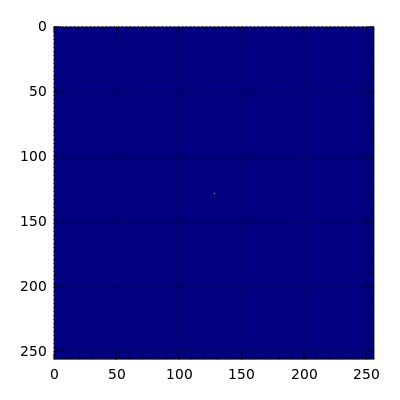

In [4]:
Winston.set_default_plot_size(400,400)
imagesc(real(rho[:,:,129]))
grid(true)

In [5]:
x = SharedArray(Float32, 150000000)
x[:] = rand(Float32, Int(150000000))*999+1;
y = SharedArray(Float32, 150000000)
y[:] = rand(Float32, Int(150000000))*999+1;
z = SharedArray(Float32, 150000000)
z[:] = rand(Float32, Int(150000000))*999+1;
@time c = from_cic!(x,y,z,rho,1,1000);

 10.742519 seconds (240.82 k allocations: 11.275 MB)


  3.582014 seconds (686.93 k allocations: 31.475 MB, 0.32% gc time)


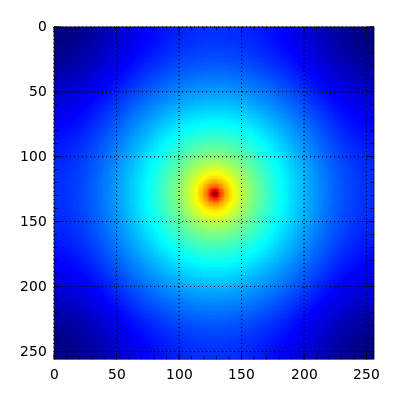

In [6]:
@time g = to_g_fft!(rho, 1000, 3.0)

imagesc(log(abs(g[:,:,129]))*100)
grid(true)

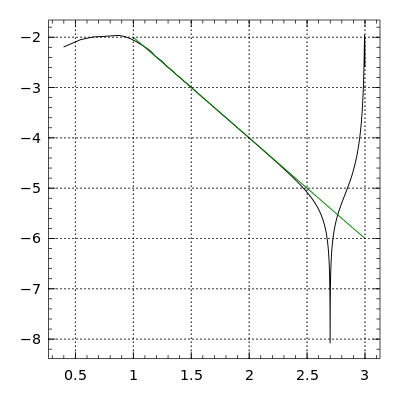

In [9]:
y = linspace(503.5,1500,1000)
x = ones(1000)*501
z = ones(1000)*501

hold(false)
plot(log10(y-501), log10(abs(from_cic_dy(x,y,z,g,1,1000))),"k-")
hold(true)

plot(log10(10:999), -2log10(10:999),"g")
#ylim(-5,1.0)
hold(false)
grid(true)

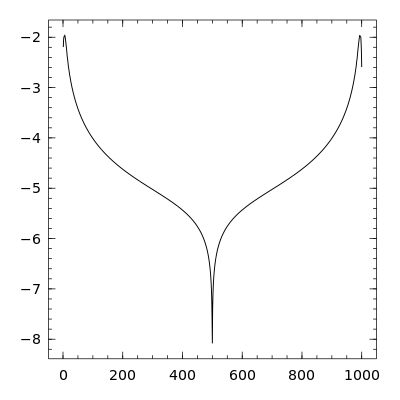

In [10]:
plot(log10(abs(from_cic_dy(x,y,z,abs(g),1,1000))))

In [11]:
from_cic_dy(x,y,z,abs(g),1,1000)

1000-element Array{Float32,1}:
 -0.00638735
 -0.00893589
 -0.0101273 
 -0.0103766 
 -0.0106259 
 -0.0108751 
 -0.0102879 
 -0.00929652
 -0.00830509
 -0.00731366
 -0.00649828
 -0.00573907
 -0.00497986
  ⋮         
  0.00688074
  0.00781311
  0.00880454
  0.00979597
  0.0107874 
  0.0107496 
  0.0105003 
  0.010251  
  0.0100018 
  0.00765203
  0.00510348
  0.00255494